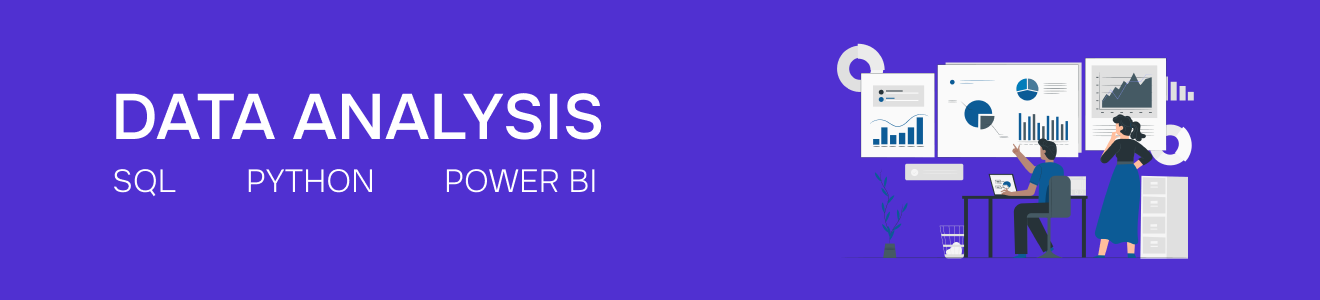

# <center> Study description

**Data description:**  
Data of grocery store - price, quantity and revenue in detalization of categories, products and customers.

**Task description:**  
It is necessary to conduct ABC and XYZ analysis of product categories.

**Content:**
1. Data preparation
2. Statistical data analysis
3. ABC analysis
4. XYZ analysis
5. Conclusion

# <center>  1. Data preparation

In [105]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [42]:
df = pd.read_excel('C:/Users/abelova/ABC_XYZ/Dashboard.xlsx')

In [43]:
df.shape

(19342, 10)

In [44]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Дата,Заказчик,Город,Регион,Категория,Товар,Цена за штуку,Количество,Выручка
1,NaN,2021-01-01 00:00:00,Sweetables,Гамбург,Север,Крупы,Гречка,1.4,216,302.4
2,NaN,2021-01-01 00:00:00,Sweetables,Гамбург,Север,Сухофрукты,Изюм,0.99,127,125.73
3,NaN,2021-01-01 00:00:00,Gold Food,Штутгарт,Юг,Масла,Подсолнечное масло,1.19,270,321.3
4,NaN,2021-01-01 00:00:00,NutriFix,Штутгарт,Юг,Напитки,Зеленый чай,0.95,196,186.2


Deleting empty columns and renaming necessary columns.

In [45]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [46]:
df.drop(0, axis = 0, inplace = True)

In [47]:
df.rename({'Unnamed: 1': 'date', 'Unnamed: 2': 'company', 'Unnamed: 3': 'city', 
           'Unnamed: 4': 'region', 'Unnamed: 5': 'category', 'Unnamed: 6': 'good',
           'Unnamed: 7': 'price', 'Unnamed: 8': 'quantity', 'Unnamed: 9': 'revenue'}, axis = 1, inplace = True)

In [48]:
df.head()

,date,company,city,region,category,good,price,quantity,revenue
1,2021-01-01 00:00:00,Sweetables,Гамбург,Север,Крупы,Гречка,1.4,216,302.4
2,2021-01-01 00:00:00,Sweetables,Гамбург,Север,Сухофрукты,Изюм,0.99,127,125.73
3,2021-01-01 00:00:00,Gold Food,Штутгарт,Юг,Масла,Подсолнечное масло,1.19,270,321.3
4,2021-01-01 00:00:00,NutriFix,Штутгарт,Юг,Напитки,Зеленый чай,0.95,196,186.2
5,2021-01-01 00:00:00,NutriFix,Штутгарт,Юг,Сухофрукты,Сушеные яблоки,1.09,108,117.72


Changing data types to proper ones.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19341 entries, 1 to 19341
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      19341 non-null  object
 1   company   19341 non-null  object
 2   city      19341 non-null  object
 3   region    19341 non-null  object
 4   category  19341 non-null  object
 5   good      19341 non-null  object
 6   price     19341 non-null  object
 7   quantity  19341 non-null  object
 8   revenue   19341 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [50]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True, infer_datetime_format=True)

In [51]:
df = df.astype({'price': np.float, 'quantity': np.int64, 'revenue': np.float})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19341 entries, 1 to 19341
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      19341 non-null  datetime64[ns]
 1   company   19341 non-null  object        
 2   city      19341 non-null  object        
 3   region    19341 non-null  object        
 4   category  19341 non-null  object        
 5   good      19341 non-null  object        
 6   price     19341 non-null  float64       
 7   quantity  19341 non-null  int64         
 8   revenue   19341 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.5+ MB


# <center> 2. Statistical data analysis

In [53]:
# percent of empty cells in every column
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
company,0.000000
city,0.000000
region,0.000000
category,0.000000
good,0.000000
price,0.000000
quantity,0.000000
revenue,0.000000


In [54]:
df.describe()

,price,quantity,revenue
count,19341.000000,19341.000000,19341.000000
mean,1.196117,199.789566,230.349680
std,0.964061,218.497129,325.717643
min,0.550000,6.000000,3.900000
25%,0.650000,65.000000,62.370000
50%,0.990000,127.000000,132.090000
75%,1.190000,251.000000,274.800000
max,5.500000,2316.000000,9608.500000


Maximum quantity and revenue are quite high, maybe there is an outlier, will check. Other metrics look normal.

Analyzing price, quantity and revenue separetely.

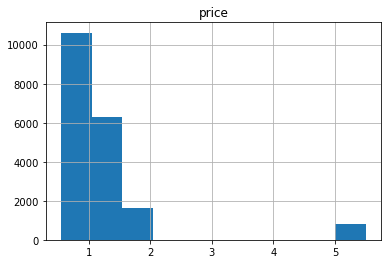

In [55]:
df.hist(['price']);

There is a strange price (>5), let's look, what product has such price.

In [56]:
df['good'][df['price']>5].value_counts()

Кофе    824
кофе      1
Name: good, dtype: int64

Found naming duplication due to register, let's correct it.

In [57]:
df['good'] = df['good'].apply(lambda g: 'Кофе' if g == 'кофе' else g)

In [58]:
# check duplicate naming for other goods
df['good'].value_counts()

Базилик               877
Моцарелла             837
Зеленый чай           833
Кофе                  825
Черный перец          818
Кориандр              816
Шоколад               813
Гауда                 813
Килька в томате       813
Зефир                 813
Курага                812
Рис                   811
Гречка                809
Оливковое масло       803
Мармелад              802
Черный чай            800
Шпроты                799
Филадельфия           790
Изюм                  788
Подсолнечное масло    782
Говядина тушеная      775
Сливочное масло       774
Перловка              769
Сушеные яблоки        769
Name: good, dtype: int64

In [59]:
df['category'].value_counts()

Специи        2511
Напитки       2458
Сыры          2440
Сладости      2428
Крупы         2389
Консервы      2387
Сухофрукты    2369
Масла         2359
Name: category, dtype: int64

In [60]:
df['company'].value_counts()

foodbite          2481
Sweetables        2433
Organica          2433
Gold Food         2432
Cooking Corner    2416
NutriFix          2409
Go Bio            2382
mymeal            2355
Name: company, dtype: int64

Moving on to quantity and revenue analysis.

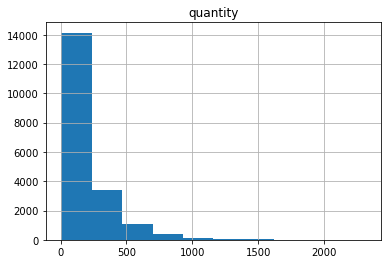

In [61]:
df.hist(['quantity']);

Distribution of quantuty seems to be adequate, most observations have small quantity of products. With quantity increase number of observations declines.

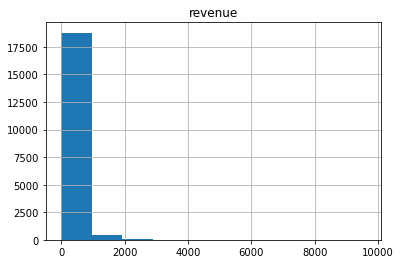

In [62]:
df.hist(['revenue']);

Revenue seems a little bit strange, so let's add a check, that all revenues were counted correctly.

In [63]:
df['revenue_check']=df['price']*df['quantity']-df['revenue']

In [64]:
df['revenue_check'].value_counts()

0.0    19341
Name: revenue_check, dtype: int64

In [65]:
df.drop('revenue_check', axis = 1, inplace = True)

Everything is correct, so we will analyse all variables together.

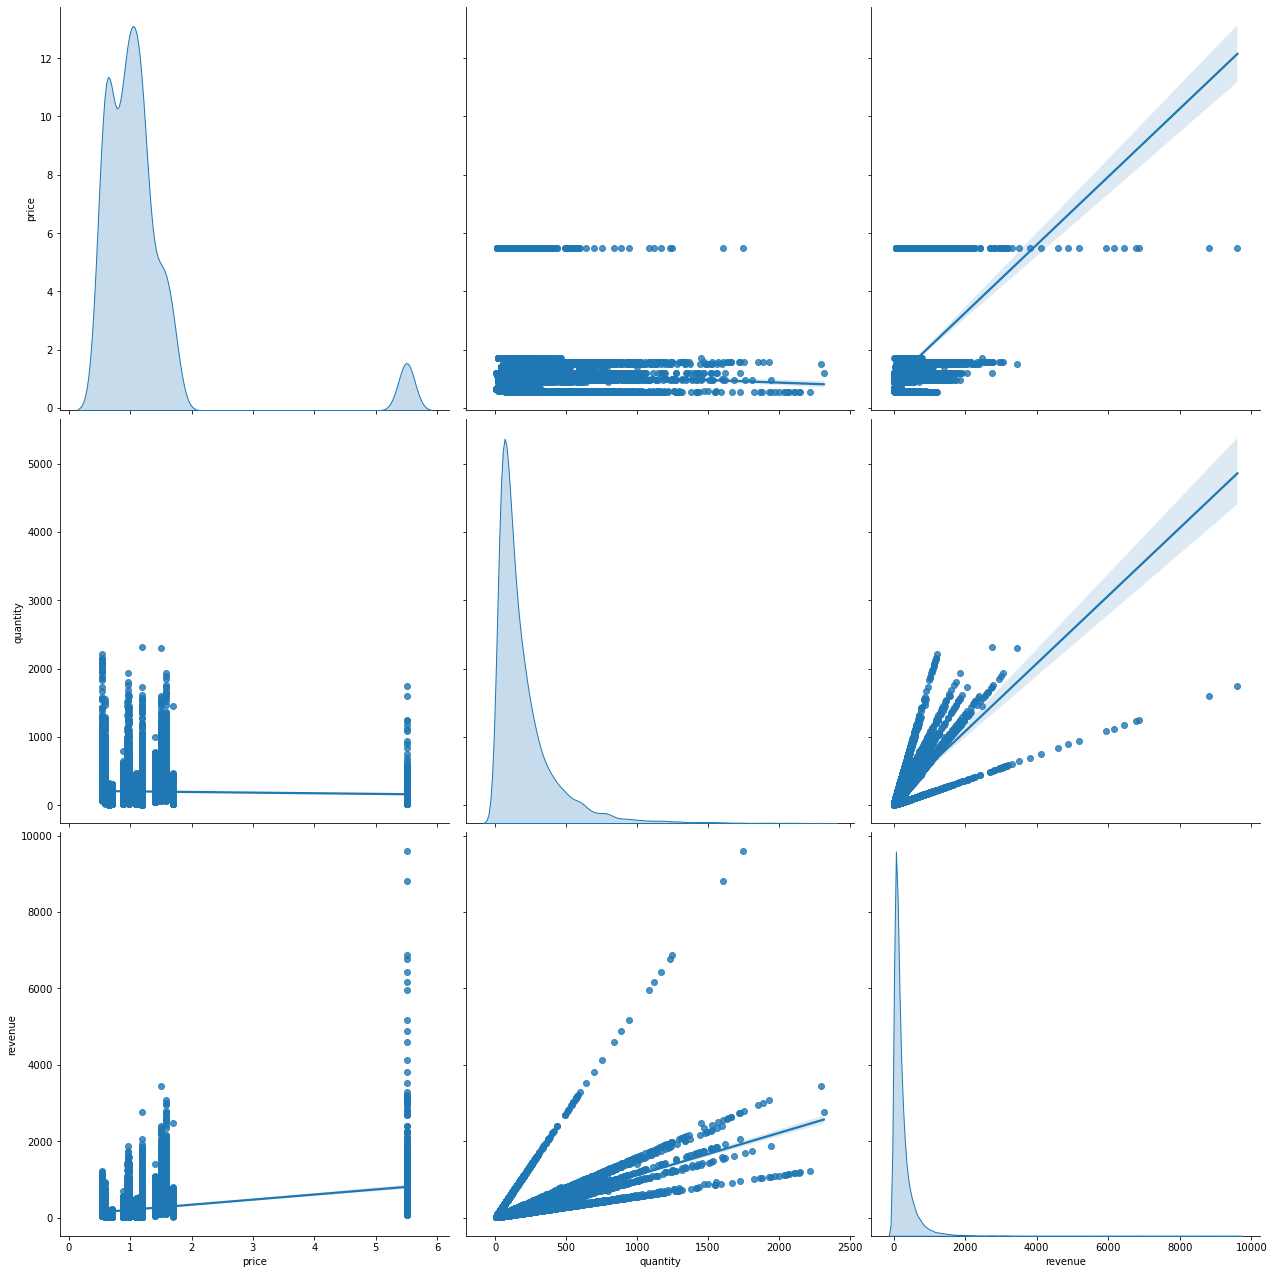

In [66]:
sns.pairplot(df, kind = 'reg', diag_kind = 'kde', size = 6);

Data have only one product with price more than 2$ - coffee. Other correlation are quite simple and obvious - increasing of quantity leads to revenue raising.

# <center> 3. ABC analysis

ABC analysis is helping to range categories based on revenue value.  
Creating a special function for ABC analysis using cycle.

In [67]:
abc_per = []
category_abc = pd.DataFrame({'category': df['category'].unique()})
for i in range (category_abc.shape[0]):
    abc = sum(df['revenue'][df['category'] == category_abc['category'][i]])/sum(df['revenue'])
    abc_per.append(round(abc*100,1))
category_abc['abc_per'] = abc_per
category_abc = category_abc.sort_values(by = 'abc_per', ascending = False)

In [68]:
category_abc_new = category_abc.reset_index(drop = True)
# calculating cumulative total
category_abc_new['abc_per_accum'] = category_abc_new['abc_per'].cumsum()
# category defenition
category_abc_new['abc_group'] = category_abc_new['abc_per_accum'].apply(lambda abc: 'A' if abc < 80 else('B' if  80 <= abc < 95 else 'C'))

In [69]:
category_abc_new

,category,abc_per,abc_per_accum,abc_group
0,Напитки,23.3,23.3,A
1,Масла,19.5,42.8,A
2,Крупы,17.1,59.9,A
3,Сыры,16.9,76.8,A
4,Сладости,6.9,83.7,B
5,Сухофрукты,6.7,90.4,B
6,Консервы,5.3,95.7,C
7,Специи,4.2,99.9,C


According to ABC analysis:
1. A-group: key drivers of revenue. Main categories of products are: drinks, oils, cereals and cheeses.
2. B-group: reliable products with moderate revenue. Sweets and dry fruites are intermediate goods.
3. C-group: least important products. Least of focus should be canned food and spices, as they represent only 5% of revenue, maybe they should be removed from assortiment.

# <center> 4. XYZ analysis

XYZ analysis is used to classify products according to variability of their demand. 
For XYZ analysis we need additional devision of dataset by months.

In [70]:
df['month']=df['date'].apply(lambda x: x.month)
df['year']=df['date'].apply(lambda x: x.year)
df['year_month']=df['date'].apply(lambda x: x.year*100+x.month)

In [71]:
df.head()

,date,company,city,region,category,good,price,quantity,revenue,month,year,year_month
1,2021-01-01,Sweetables,Гамбург,Север,Крупы,Гречка,1.40,216,302.40,1,2021,202101
2,2021-01-01,Sweetables,Гамбург,Север,Сухофрукты,Изюм,0.99,127,125.73,1,2021,202101
3,2021-01-01,Gold Food,Штутгарт,Юг,Масла,Подсолнечное масло,1.19,270,321.30,1,2021,202101
4,2021-01-01,NutriFix,Штутгарт,Юг,Напитки,Зеленый чай,0.95,196,186.20,1,2021,202101
5,2021-01-01,NutriFix,Штутгарт,Юг,Сухофрукты,Сушеные яблоки,1.09,108,117.72,1,2021,202101


Creating a special table for XYZ analysis using pivot table.

In [76]:
category_xyz = pd.pivot_table(df, index = 'category', columns = 'year_month', values='revenue', aggfunc = np.sum)
category_xyz['deviation'] = round((category_xyz.iloc[:,0:35].std(axis=1, ddof=0) / category_xyz.iloc[:,0:35].mean(axis=1))*100,0)
category_xyz['xyz_group'] = category_xyz['deviation'].apply(lambda abc: 'X' if abc < 10 else('Y' if  10 <= abc < 25 else 'Z'))

In [77]:
category_xyz

year_month,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,...,202305,202306,202307,202308,202309,202310,202311,202312,deviation,xyz_group
category,,,,,,,,,,,,,,,,,,,,,
Консервы,2778.17,9977.60,10752.56,8325.50,6125.43,3393.55,3887.13,1367.51,2917.34,3395.88,...,10608.01,3393.95,3713.76,5252.19,8561.52,2072.04,6432.09,10819.03,74.0,Z
Крупы,10931.32,28002.92,41709.60,23571.28,15791.44,9349.08,11457.80,8611.04,14836.84,15374.72,...,51107.92,11569.72,7212.20,20233.48,27311.76,7532.84,18617.88,33680.96,71.0,Z
Масла,8201.41,37907.59,41403.40,33658.99,13799.64,7498.32,15433.13,6746.54,15927.40,18127.67,...,50652.90,7187.21,16249.14,13171.88,23044.61,11597.76,22243.79,38922.64,71.0,Z
Напитки,7936.70,38992.07,49378.23,33662.54,15406.21,10108.84,14600.62,7177.80,15648.96,17516.88,...,41948.77,15472.14,11609.25,17542.38,36660.12,7150.82,24453.80,43957.55,74.0,Z
Сладости,2800.40,12846.65,19931.60,10218.90,4417.55,4604.20,4552.80,2012.70,4089.55,7041.80,...,19400.40,4977.10,4774.95,4758.50,9690.50,2568.95,8162.35,11752.75,75.0,Z
Специи,1003.32,7809.63,10334.11,4137.73,3746.41,2238.83,2834.25,1568.27,2901.03,4941.01,...,10926.38,1974.45,1612.28,3813.92,4076.67,834.53,5008.53,10700.57,77.0,Z
Сухофрукты,4425.08,13390.16,14141.86,8190.00,6646.71,3485.16,4804.35,2814.15,5561.63,4553.58,...,16078.68,4621.73,5395.96,4806.41,8459.93,1880.17,8830.55,15037.92,75.0,Z
Сыры,8244.31,26350.42,39478.72,34374.94,16244.82,8878.62,12899.73,7835.08,11520.32,12446.29,...,46331.47,9431.74,9777.98,14010.34,20971.83,12852.80,20678.69,31238.45,62.0,Z


According to XYZ analysis, all categories of products are in Z-group: with demand strongly fluctuating, it is difficult to make reliable forecasting for demand of such products. To check this conclusion let's take a look at revenue dynamics graph (by days).

In [126]:
df_date = df.pivot_table(index = 'date', values = 'revenue', aggfunc = 'sum')

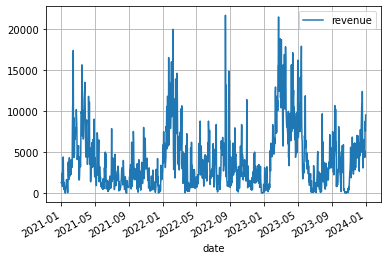

In [130]:
df_date.plot(grid = True);

It is necessary to additionaly analyse monthly dynamics of revenue.

In [139]:
df_month_2021 = df[df['year']==2021]
df_month_2021 = df_month_2021.pivot_table(index = 'month', values = 'revenue', aggfunc = 'sum')

In [140]:
df_month_2022 = df[df['year']==2022]
df_month_2022 = df_month_2022.pivot_table(index = 'month', values = 'revenue', aggfunc = 'sum')

In [141]:
df_month_2023 = df[df['year']==2023]
df_month_2023 = df_month_2023.pivot_table(index = 'month', values = 'revenue', aggfunc = 'sum')

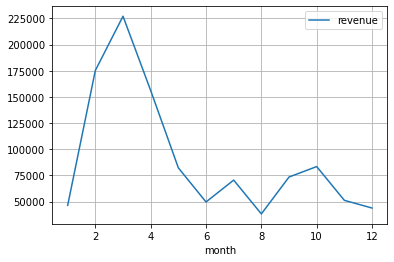

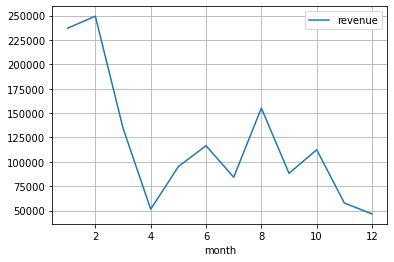

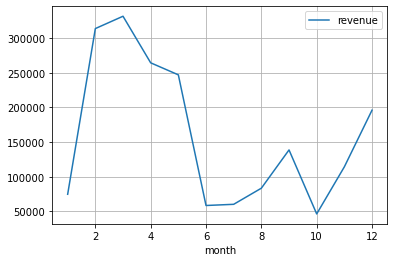

In [142]:
df_month_2021.plot(grid = True);
df_month_2022.plot(grid = True);
df_month_2023.plot(grid = True);

We really see great flactuations of revenue during months of the year. There is strong seasonality - most revenue comes in the firat and second quarter of year, peak months - February and March.

# <center> 5. Conclusion

1. Most expensive product in assortiment is coffee.
2. Special attention should be paid categories of canned food and spices, maybe they should be removed from assortiment.
3. Demand for all categories of good is unstable due to strong sesonality.